In [665]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [666]:
data = pd.read_csv("data.csv")

In [667]:
data["busi_date"] = pd.to_datetime(data["busi_date"])
data["industry"] = data["industry"].str.replace(" ","")
data["industry"] = data["industry"].str.lstrip("ind")
data["industry"] = data["industry"].str.zfill(2)
data["industry"] = "ind"+ data["industry"]

In [668]:
data = data.groupby(["busi_date","order_book_id"])["mktval","holding_days"].sum()
data = data.reset_index()
data["busi_date"] = data["busi_date"].dt.date

In [669]:
data = data[data.mktval == 0.0]

In [670]:
data = data.pivot_table(index = "busi_date", columns = "order_book_id", values = "holding_days")

In [671]:
data.index = pd.to_datetime(data.index)

In [672]:
def calculate_diff(column):
    values = pd.DataFrame(column)
    values["date"] = data.index
    values = values.dropna()
    if len(values) >= 2:
        return values.index[1] - values.index[0], values["date"].iloc[0]
    else:
        return np.nan

temp = data.reset_index(drop=True)
day_difference = temp.apply(calculate_diff).T.rename(columns={0: "num_days", 1: "busi_date"})
day_difference = day_difference.dropna().reset_index()

In [673]:
results = day_difference.groupby(["busi_date","num_days"])["order_book_id"].size().to_frame()
results = results.reset_index()

In [674]:
# values = day_difference.groupby("num_days").size().to_frame("num")
# values = values.replace(206,0)
# values["dates"] = data.index
# values = values.reset_index()
# values.index = pd.to_datetime(values["dates"])
# values.index = values.index.astype(str)
# values

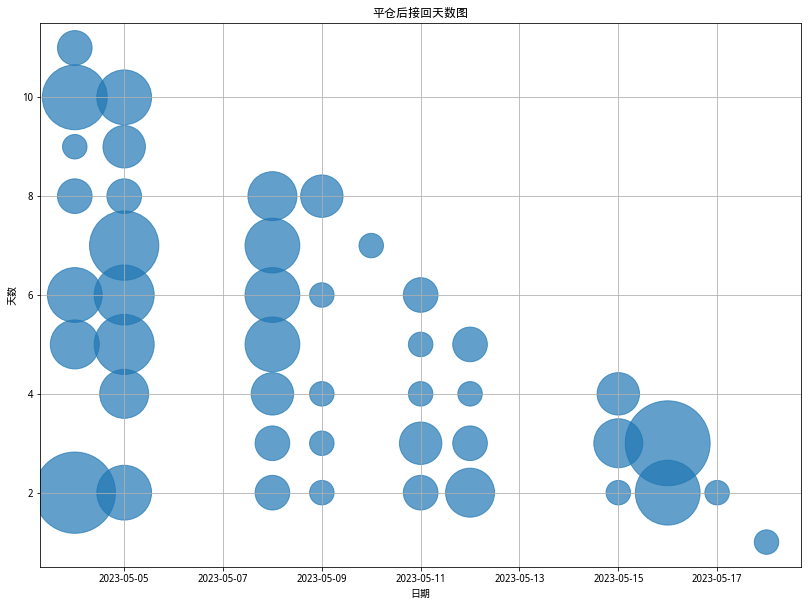

In [679]:
plt.figure(figsize=(30,10))
ax=plt.subplot(121)
ax.grid(axis = "both")
size = results["order_book_id"]
colors = np.random.rand(12) 
ax.scatter(results["busi_date"], results["num_days"], s = size*600, alpha = 0.7)
plt.title('平仓后接回天数图')
plt.ylabel('天数')
plt.xlabel('日期')
plt.show()

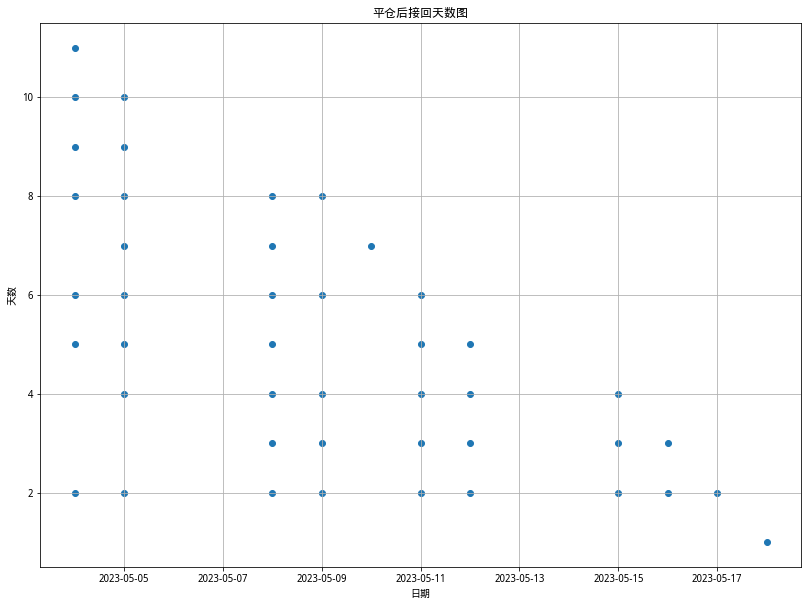

In [680]:
plt.figure(figsize=(30,10))
ax=plt.subplot(121)
ax.scatter(results["busi_date"], results["num_days"])
ax.grid(axis = "both")
plt.title('平仓后接回天数图')
plt.ylabel('天数')
plt.xlabel('日期')
plt.show()